# Applying a Data Science process to AirBnB dataset (Seattle)

####                 (  Initial project for Udacity Data Scientist Nanodegree  )

## Introduction

This post represents an example of analyzing an AirBnB dataset (Seattle in this case) in a way which could help a home-owner to
focus on important topics / features and so be able to offer a great experience to his guests while increasing revenues.
<br>
<br>
<br>

### My 3 questions for my analysis are as follows:

#### Question 1:   Can we train a model which could predict review_scores_rating with mae < 10?
#### Question 2:   Can we identify a useful set of features with meaningful impact on target?
#### Question 3:   How do prices of apartments vary by number of beds available??

<br>
<br>
<br>

## 1. Can we train a model which could predict review_scores_rating with mae < 10? <br>

<tr>
<td> <img src="crisp-dm.png" alt="Drawing" style="width: 550px;"/> </td>
<td> <strong><em>In order to answer the first question we have a good opportunity to follow the CRISP-DM process</em></strong> <td>
</tr>

### 1.1 Business Understanding

The Business Understanding is a very important part of the process and ignoring this step can lead to a lot of wasted time or completely ruined projects.

This step usually includes talking to SME's and business owners / business experts, reading articles about the business and many times it can overlap with Data Understanding phase as the dataset fields can give us a clue what to ask.

I was a bit lucky in this case because some time ago I reached an AirBnB superhost badge so I knew how the business is running and what to expect. However for those wo are not familiar with AirBnB hosting, I would recommend to start here: https://www.airbnb.com/help/home

### 1.2 Data Understanding

In Data Understanding part we will: 

 - check some basic data characteristics like shape and data types

 - have a look at the dataset itself.

 - We can have a closer look at the target and some other interesting and/or suspicious columns

 - We can also prepare list of columns / features to be removed from training dataset

In [1]:
# import libraries and set 
import pandas as pd
import numpy as np
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sn
from matplotlib import pyplot as plt
from IPython.display import display
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', -1)
import platform
print(platform.python_version())

3.6.9


In [3]:
# load data and print shape
raw_df = pd.read_csv('{}/listings.csv'.format(os.getcwd()))
print (raw_df.shape)

(3818, 92)


In [4]:
# print dtype counts
raw_df.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [5]:
# preview data
# raw_df.head()

In the first preview I realized that we need to get rid of some text fields to be able to preview data easily.
However in a real life project I would recommend to have a closer look at these text fields too as they can be turn into key features if a correct preprocessing & feature engineering is applied.

In [6]:
# Identify text & url fields that are not usefull for research & model training

cols_to_remove = []
cols_to_check = []
for col in raw_df.select_dtypes(include=['object']).columns:
    if raw_df[col].str.len().dropna().median() > 40:
        cols_to_remove.append(col)
    elif raw_df[col].str.len().dropna().median() > 20:
        cols_to_check.append(col)
        
print ('cols_to_remove: ', len(cols_to_remove))
print (cols_to_remove, '\n')

print ('cols_to_check: ', len(cols_to_check))
print (cols_to_check)

cols_to_remove:  17
['summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_verifications', 'street', 'amenities'] 

cols_to_check:  3
['listing_url', 'name', 'host_location']


In [7]:
# Can we remove also cols_to_check fields?  Let's check what the values look like
raw_df.name.value_counts().head(10)

Capitol Hill Apartment                 3
Private bath walk UW U Village(202)    2
Cozy Ballard Apartment                 2
Center UW Blast Internet New #102      2
Ravenna Retreat                        2
In-City Suite Retreat                  2
Luxury Apt/Downtown West Seattle       2
Seattle Downtown Convention Center     2
Downtown Seattle Pike Place Market     2
Privacy & gorgeous panoramic views!    2
Name: name, dtype: int64

In [8]:
# Preview the dataset
cols_to_remove += cols_to_check
preview_cols = [col for col in raw_df.columns if col not in cols_to_remove]
raw_df[preview_cols].head(5)

,id,scrape_id,last_scraped,experiences_offered,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,2016-01-04,none,956883,Maija,2011-08-11,within a few hours,96%,100%,f,Queen Anne,3.0,3.0,t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,20160104002432,2016-01-04,none,5177328,Andrea,2013-02-21,within an hour,98%,100%,t,Queen Anne,6.0,6.0,t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,20160104002432,2016-01-04,none,16708587,Jill,2014-06-12,within a few hours,67%,100%,f,Queen Anne,2.0,2.0,t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,NaN,$975.00,NaN,NaN,"$1,000.00",$300.00,10,$25.00,4,30,5 weeks ago,t,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,20160104002432,2016-01-04,none,9851441,Emily,2013-11-06,NaN,NaN,NaN,f,Queen Anne,1.0,1.0,t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.638473,-122.369279,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,NaN,$100.00,$650.00,"$2,300.00",NaN,NaN,1,$0.00,1,1125,6 months ago,t,0,0,0,143,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,20160104002432,2016-01-04,none,1452570,Emily,2011-11-29,within an hour,100%,NaN,f,Queen Anne,2.0,2.0,t,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.632918,-122.372471,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,NaN,$450.00,NaN,NaN,$700.00,$125.00,6,$15.00,1,1125,7 weeks ago,t,30,60,90,365,2016-01-04,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [58]:
# Identify columns that have more than 90% of missing values :
raw_df = raw_df.fillna(value=np.nan).replace('None', np.nan).replace('none', np.nan)
miss_val = list(raw_df[preview_cols].columns[raw_df[preview_cols].isnull().mean() > 0.90])
miss_val

['experiences_offered', 'square_feet', 'license']

In [59]:
# Identify high cardinality fields, natural-key like fields & id's
preview_cols = [col for col in preview_cols if col not in miss_val]

unique_val_cols = []
cols_to_check = []
for col in raw_df[preview_cols].columns:
    if raw_df[col].dropna().value_counts().shape == raw_df[col].dropna().shape:
        unique_val_cols.append(col)
    elif raw_df[col].dropna().value_counts().shape[0] > float(raw_df[col].dropna().shape[0])*0.9:
        cols_to_check.append(col)
print (unique_val_cols)
print (cols_to_check)

['id', 'latitude', 'longitude']
[]


In [60]:
# Identify single value fields
single_val_cols = []
for col in raw_df[preview_cols].columns:
    if raw_df[col].dropna().value_counts().shape[0] == 1:
        single_val_cols.append(col)

print (single_val_cols)

['scrape_id', 'last_scraped', 'market', 'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'requires_license', 'jurisdiction_names']


In [61]:
# Identify columns with perfect direct or perfect inverse linear correlation and/or high correlation

df_corr = raw_df.corr().stack().reset_index()
df_corr.columns = ['FEATURE_1', 'FEATURE_2', 'CORRELATION']
df_corr[((df_corr.CORRELATION>0.85) | ((df_corr.CORRELATION<-0.85))) & (df_corr.FEATURE_1!=df_corr.FEATURE_2)]

,FEATURE_1,FEATURE_2,CORRELATION
59,host_listings_count,host_total_listings_count,1.000000
86,host_total_listings_count,host_listings_count,1.000000
177,accommodates,beds,0.861119
258,beds,accommodates,0.861119
407,availability_30,availability_60,0.936122
408,availability_30,availability_90,0.875778
434,availability_60,availability_30,0.936122
436,availability_60,availability_90,0.973353
462,availability_90,availability_30,0.875778
463,availability_90,availability_60,0.973353


In [62]:
# Review other suspicious columns:

def review_susp_col(df, col_name):
    """ Input params: df: pandas df, col_name: string
    Output: Prints out df shape and first 10 values to preview
    """
    print ('{}: {}'.format(col_name, df[col_name].value_counts().shape))
    print (df[col_name].value_counts().head(10))
    print ('\n')

review_susp_col(raw_df, 'city')
review_susp_col(raw_df,'state')

city: (7,)
Seattle                  3810
West Seattle             2   
Seattle                  2   
seattle                  1   
西雅图                      1   
Ballard, Seattle         1   
Phinney Ridge Seattle    1   
Name: city, dtype: int64


state: (2,)
WA    3817
wa    1   
Name: state, dtype: int64




Finally I define a custom list of columns to be removed before model training takes place. I add to this list: 

 - fields from the last "Review other suspicious columns" check,

 -  host_total_listings_count which correlates with other field

 - host_is_superhost   - as this one indicates and is related to high review_scores_rating

 - and some other fields which don't seem to be important for our model

In [63]:
custom_decision_cols_to_remove = ['host_name', 'host_total_listings_count', 'city', 'smart_location', 'state', 'host_id', 
                                  'host_is_superhost', 'first_review', 'last_review']

### 1.3 Data Preparation

In Data Preparation part I will apply some simple feature engineering and basic preprocessing where I drop unwanted columns, missing target rows and fill na's and/or replace missing values.

In [79]:
def custom_feature_engineering(raw_df, date_col_list, currency_cols):
    """
    Implement basic feature engineering which replaces 
    the date object fields with number of days & convert
    currency fields to float type.
    :param raw_df: type Pandas dataframe
    :param date_col_list :type list
    :param currency_cols: type list
    :return: type pandas dataframe
    """
    
    df = raw_df.copy()
    
    # Date fields
    for col, _format in date_col_list.items():
        bf_col = df[col].dtype
        df[col] = pd.to_datetime(df[col], format=_format)
        # df[col] = pd.datetime.now().date() - df[col]
        df['temp_col'] = pd.datetime.now().date()
        df['temp_col'] = pd.to_datetime(df['temp_col'], format=_format)
        df[col] = df['temp_col'] - df[col]
        df.drop('temp_col', axis='columns', inplace=True)
        df[col] = df[col].dt.days
        print ('{}: {} --> {}'.format(col, bf_col, df[col].dtype))
        
    # Currency fields
    def clean_currency(x):
        """ If the value is a string, then remove currency 
        symbol and delimiters otherwise, the value is numeric 
        and can be converted
        """
        if isinstance(x, str):
            return(x.replace('$', '').replace(',', ''))
        else:
            return(x)
    
    for col in currency_cols:
        bf_col = df[col].dtype
        df[col] = df[col].apply(clean_currency).astype('float')
        print ('{}: {} --> {}'.format(col, bf_col, df[col].dtype))
        
    after = df.dtypes.value_counts()
    return df



date_col_dict = {'host_since': '%Y-%m-%d',
                 'first_review': '%Y-%m-%d', 
                 'last_review': '%Y-%m-%d'
                }
currency_cols = []
for col in raw_df.columns:
    if 'price' in col.lower(): currency_cols.append(col)

raw_fe_df = custom_feature_engineering(raw_df, date_col_dict, currency_cols)

host_since: object --> float64
first_review: object --> float64
last_review: object --> float64
price: object --> float64
weekly_price: object --> float64
monthly_price: object --> float64


In [80]:
def prepare_data(df, target, cols_to_remove):
    """
    Preprocess data for model training
    :param df: type Pandas dataframe
    :param target: type string
    :param cols_to_remove :type list
    :return: type pandas dataframe
    """
    init_shape = df.shape
    # Drop rows with missing target values
    df = df.dropna(subset=[target], axis=0)
    
    #Drop unwanted columns
    df = df.drop(cols_to_remove, axis=1)
    
    # Fill numeric columns na's with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].median()), inplace=True)
        
    # Fill categorical columns with empty string
    ctg_cols = df.select_dtypes(include=['object']).columns
    for col in ctg_cols:
        df[col].fillna('', inplace=True)
    
    print ('Dataframe re-shaped: {} --> {}'.format(init_shape, df.shape))
    return df


target = 'review_scores_rating'

target_related_cols = [col for col in raw_df.columns if 'review_scores' in col and col != target]
custom_decision_cols_to_remove += target_related_cols
cols_to_remove_fnl = list(set(cols_to_remove + miss_val + unique_val_cols + single_val_cols + custom_decision_cols_to_remove))

df = prepare_data(raw_fe_df, target, cols_to_remove_fnl)


Dataframe re-shaped: (3818, 92) --> (3171, 42)


### 1.4 Modeling / Evaluation

This might be the final step in order to answer question 1. We train the model and calculate the score which in our case is represented by mean absolute error. 

So can we train a model which could predict review_scores_rating with mae < 10?

In [81]:
def split_train_test_and_evaluate(df, target):
    """
    Splits data into train & test, prepares dummies, trains the model
    and returns feature importance df.
    :param df: type Pandas dataframe
    :param target: type string
    :return: feature importance dataframe, type: pandas dataframe
    """
    
    # Split dataframe into label & features
    y = df[target]
    X = df.drop(target, axis=1)
    
    # Dummy the categorical variables
    cat_vars = X.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        X = pd.concat([X.drop(var, axis=1), pd.get_dummies(X[var], prefix=var, prefix_sep='#', drop_first=True)], axis=1)
    print ('dummies_df shape: {}'.format(X.shape))
    
    # Split data into train & test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    print ('Train: {}, Test: {}'.format(X_train.shape[0], X_test.shape[0]))
    
    # Define and train the model
    reg = GradientBoostingRegressor(loss='lad', n_estimators=75, criterion='mae', max_depth=7, 
                                    learning_rate=0.06, max_features=15)
    reg.fit(X_train, y_train)
    
    # Prepare feature importance dataframe
    feats = {}
    for feature, importance in zip(X.columns, reg.feature_importances_):
        feats[feature] = importance
    feature_imp_df = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Feature_importance'})
    
    # Validate the model on test data and print out the requested score (mae)
    y_pred = reg.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print ('Mean absolute error: {}'.format(mae))
    
    return feature_imp_df
    
    
fi_df = split_train_test_and_evaluate(df, target)

dummies_df shape: (3171, 633)
Train: 2124, Test: 1047
Mean absolute error: 4.14981709750689


<br>

Due to the fact that our mae is something more than 4, the answer is obviously <b>"Yes, we can train a model which could predict review_scores_rating with mae < 10." </b> 

However I am pretty much sure that with better feature selection and more advanced feature engineering we could get even better results.

Also I have to mention here that the "Evaluation" we use is very simple - basically we only use the testing mae score. The last part of CRISP-DM process should be "Deployment" - this is applicable more in a real-life project but let's consider the next question solution our Deployment.

<br>

## Question 2: Can we identify a useful set of features with meaningful impact on target?

There are various data-science approaches for identifying important features. But whichever we choose, the best idea is to combine the approach with common sense and hands-on experience (if possible).

<br>

I decided to use the impurity-based 'feature_importances_' attribute of GradientBoosting Regressor.


The Pros are fast calculation and that it's easy to retrieve but the Cons is biased approach, as it has a tendency to inflate the importance of continuous features or high-cardinality categorical variables. And this is why we should use our common sense too - not just extract the top rated features and focus on them.

The output of the split_train_test_and_evaluate function is a dataframe with feature names and importances. 

For better review let's visualize it:

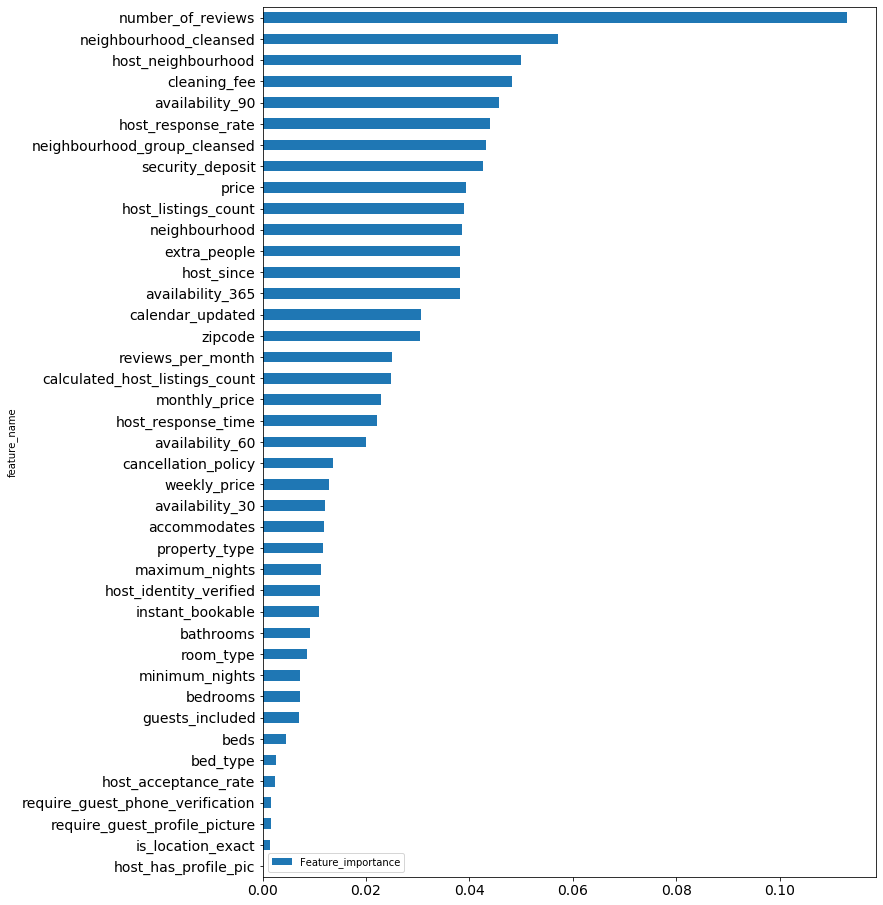

In [82]:
fi_df['feature_name'] = fi_df.index
fi_df['feature_name'] = fi_df['feature_name'].apply(lambda x: x.split('#')[0])
fi_df.reset_index(drop=True, inplace=True)
fi_norm = fi_df.groupby(['feature_name'])['Feature_importance'].agg('sum')

plot_df = fi_norm.to_frame().reset_index().sort_values(by='Feature_importance')
plot_df.plot(x='feature_name', y='Feature_importance', figsize=(11, 16), kind='barh', fontsize=14)

To get the appropriate information from the feature importance chart is not about selecting the top n features.

Now it is the time to use common sense (and let's support it with a heatmap too):

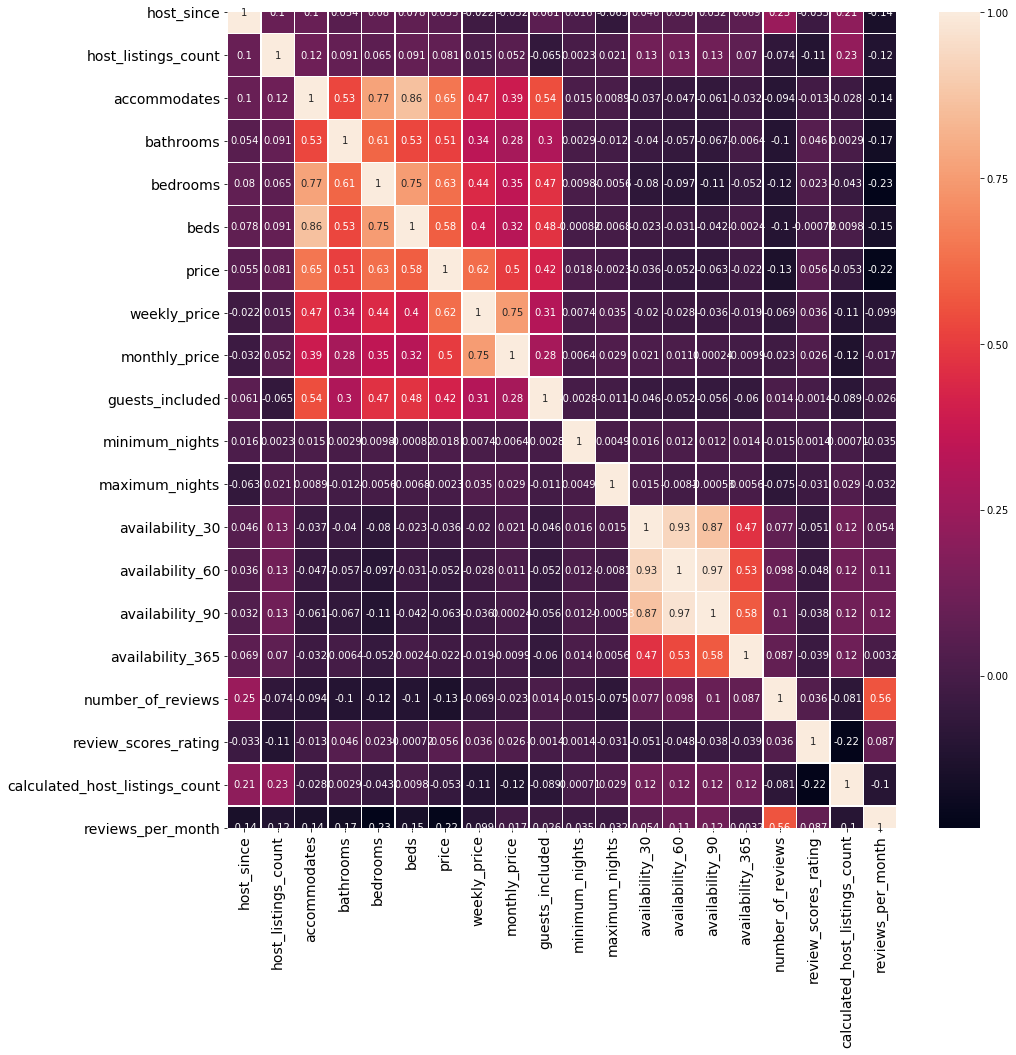

In [83]:
# Seaborn heatmap
fig, ax = plt.subplots(figsize=(15,15))
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
sn.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

The first feature in the chart is "number_of_reviews". It's obvious that this feature correlates with "host_since" and that it is important. More reviews mean more experience and also stabilized rating.

Let's have a look at the second feature - "neighbourhood_cleansed"

This is a categorical variable so I decided to use boxplot for top 20 areas. Even though it is not clear why there are such differences in revie_score_rating across the areas, the plot can help us to decide whether to buy a property in an area (if we have this possibility) or if we should be more careful (and do some deeper research) in order to gain good ratings if we are already offering a property in an area like for example the University District.

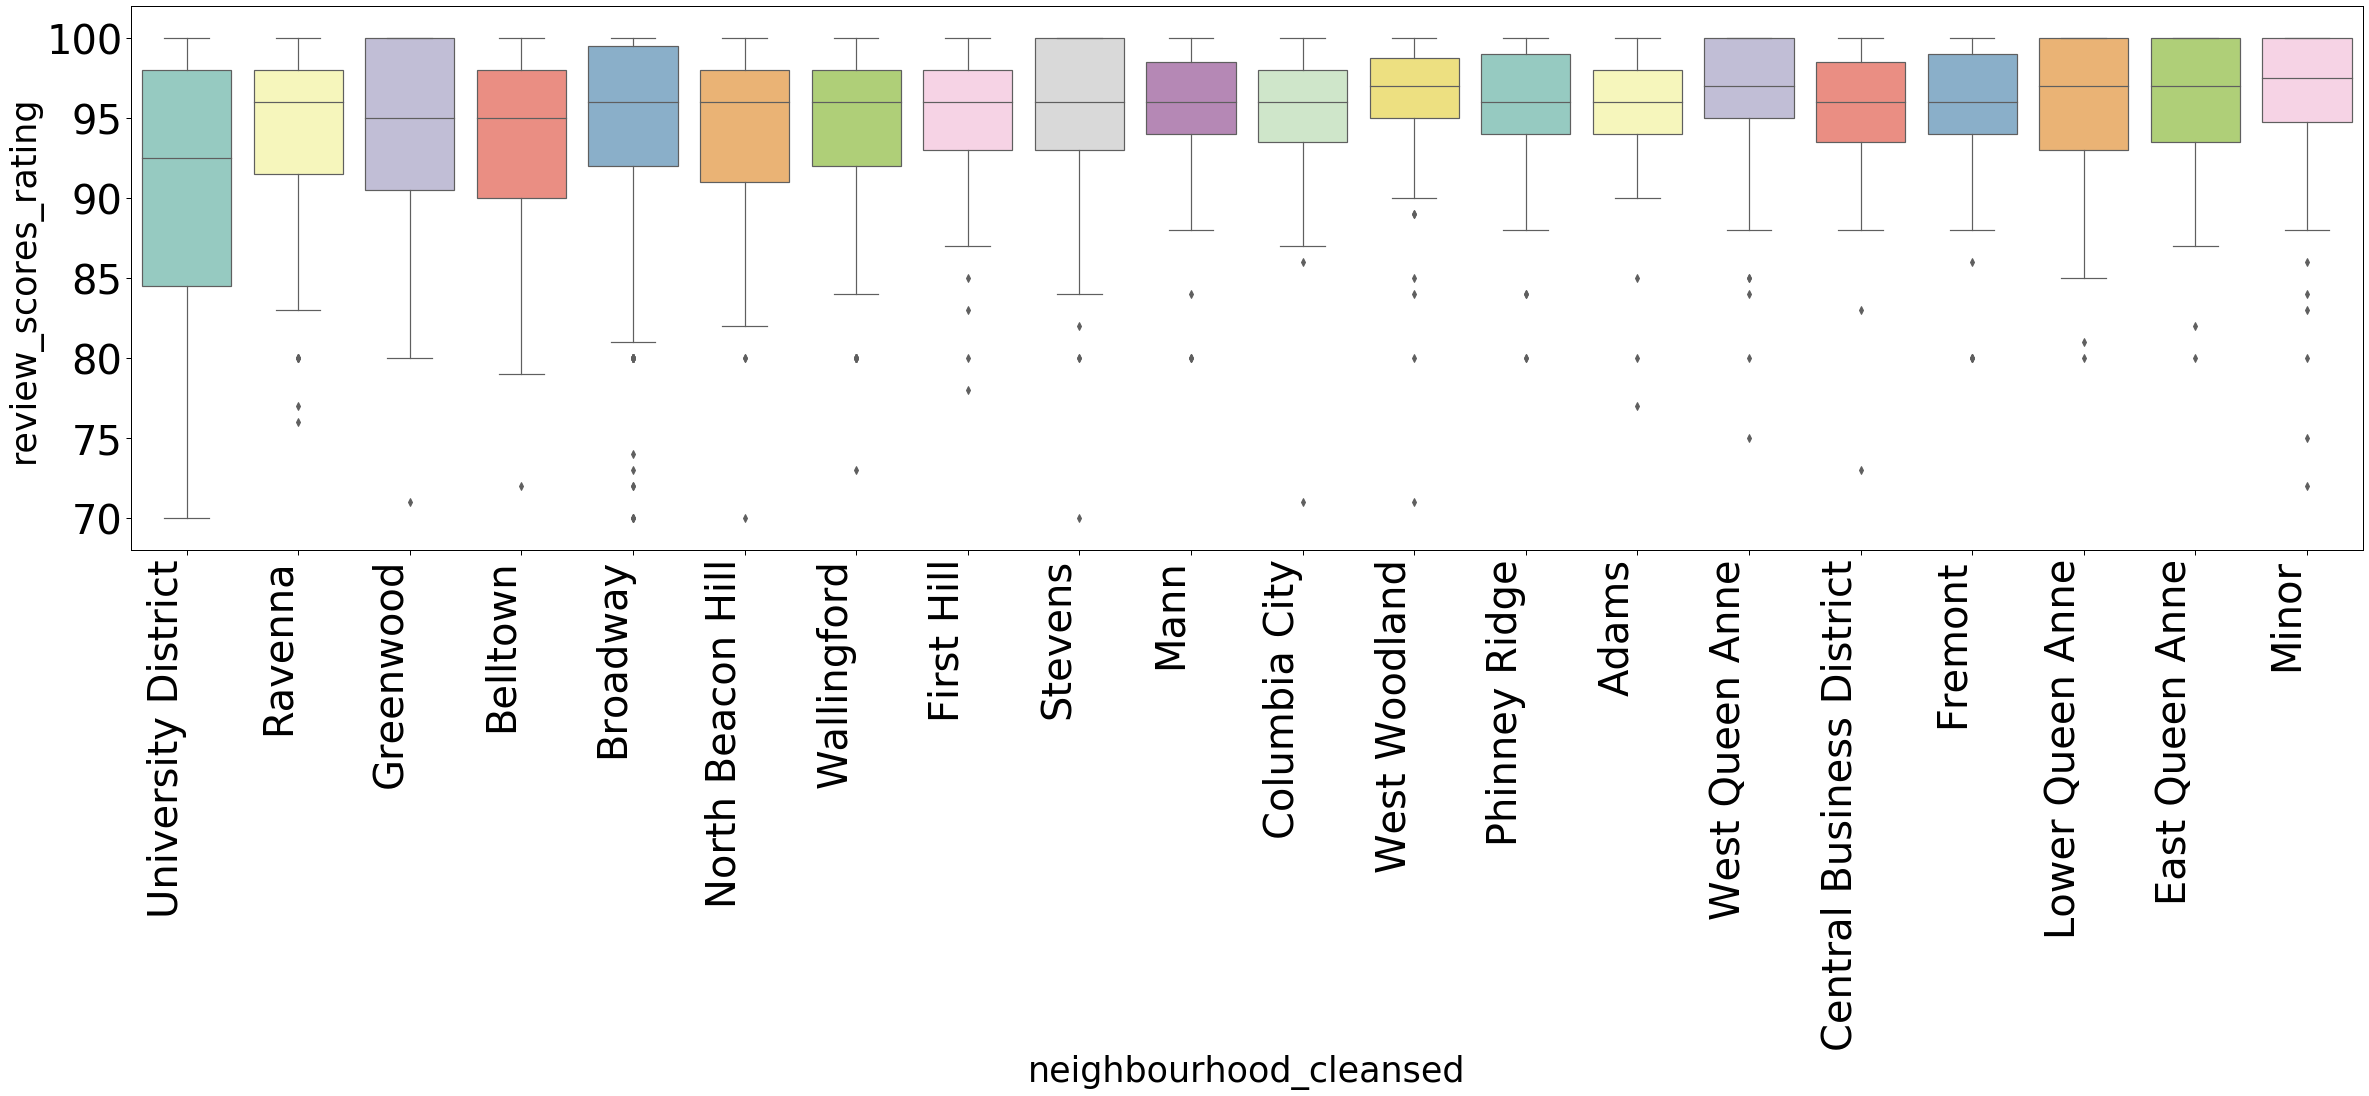

In [104]:
catg_ftr = "neighbourhood_cleansed"

# Extract the top neighbourhood_cleansed values to list
nc_20 = df.neighbourhood_cleansed.value_counts().head(20).index.tolist()

# Remove some outliers
dff = df[df[target].between(df[target].quantile(.01), df[target].quantile(1))]
dff = dff[dff[catg_ftr].isin(nc_20)]

# Prepare a helping dataframe to order the boxes in the plot
grouped = dff[[target, catg_ftr]].groupby(catg_ftr)
order_df = pd.DataFrame({col:vals[target] for col,vals in grouped}).mean().sort_values(ascending=True)

# Set some basic seaborn parameters
plt.figure(figsize=(40, 10))
# sn.set_context("paper", rc={"font.size":14,"axes.titlesize":14,"axes.labelsize":15})

# Create a plot
ax = sn.boxplot(x=catg_ftr, y=target, data=dff, palette="Set3", order=order_df.index)

# Set additional parameters
ax.set_xlabel(catg_ftr,fontsize=35)
ax.set_ylabel(target,fontsize=35)
ax.set_ylim(dff[target].min()-2, dff[target].max()+2)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(40)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(40)
    
plt.xticks(rotation=90, horizontalalignment='right')
plt.show()

Now we can skip couple of features and have a look at the prices. Let's say we have a 2-bed apartment and we need to set a price. Someone told us that lower price will help us gain better ratings. 

However from a simple scatterplot (where x=target and y=price ) we somehow cannot figure out if the person was right or wrong:

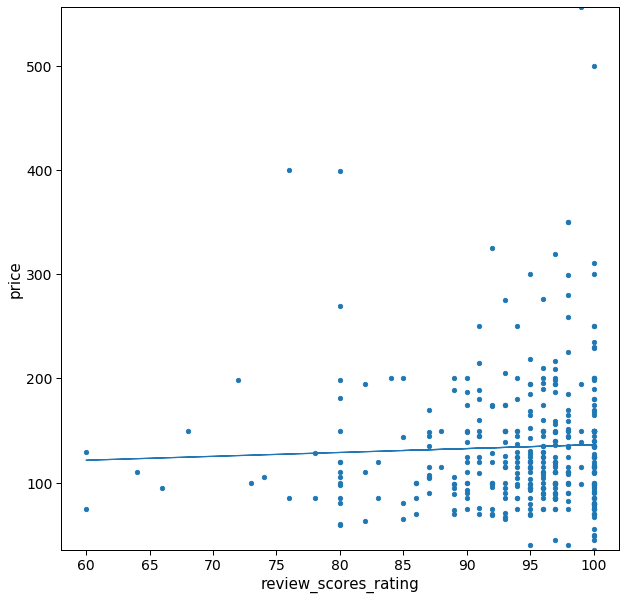

In [108]:
def plot_scatter_basic(df, y_col, target):
    """Creates a basic scatterplot with trendline.
    Input params: 
    df: pandas dataframe,
    y_col: numerical feature we compare with target (y axis)
    target: target col name (x axis)
    """
    
    # Create a plot
    ax = df.plot.scatter(x=target, y=y_col,figsize=(10, 10), fontsize=14)
    
    # Plot params config
    ax.set_xlim(df[target].min() - 2, df[target].max() + 2)
    ax.set_ylim(df[y_col].min(), df[y_col].max())
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    
    # Trendline
    ax.plot
    x = df[target]
    y = df[y_col]
    m, b = np.polyfit(x, y, 1)
    ax.plot(x, m*x + b)
    
# For the input dataframe we filter the the 2-bed Apartments only:
y_col = 'price'
plot_scatter_basic(df[(df.beds==2) & (df.property_type=='Apartment')], y_col, target)

<br>

Following function creates a scatterplot out of a grouped (by target) dataframe with median aggregate function applied to price.

An upgrade (in compare with previous plot function) is also removal of outliers:

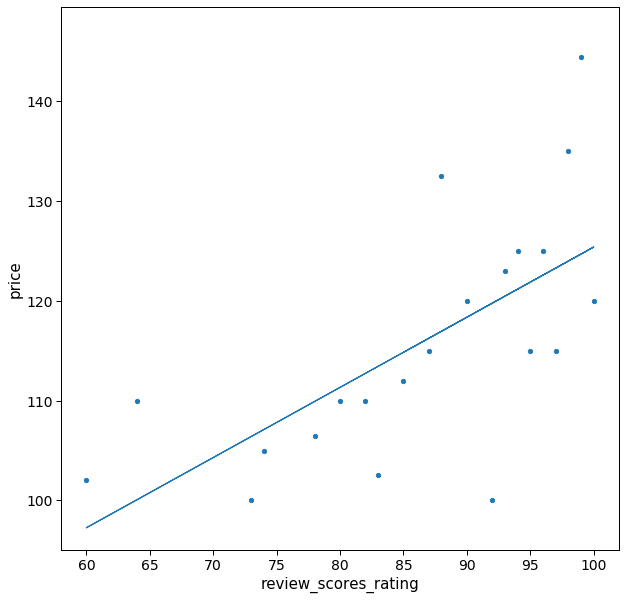

In [114]:
def plot_scatter_median(df, y_col, target):
    """Creates a basic scatterplot with trendline.
    Input params: 
    df: pandas dataframe,
    y_col: numerical feature we compare with target (y axis)
    target: target col name (x axis)
    """
    # Prepares a groupby df
    plt_df = df.groupby([target])[y_col].agg('median').to_frame().reset_index()
    
    # remove outliers
    plt_df = plt_df[plt_df[y_col].between(plt_df[y_col].quantile(.10), plt_df[y_col].quantile(.85))]
    
    # Create a plot
    ax = plt_df.plot.scatter(x=target, y=y_col, figsize=(10, 10), fontsize=14)
    
    # Config plot parameters
    ax.set_xlim(plt_df[target].min()-2, plt_df[target].max()+2)
    ax.set_ylim(plt_df[y_col].min()-5, plt_df[y_col].max()+5)
    ax.plot
    
    # Trendline
    x = df[target]
    y = df[y_col]
    m, b = np.polyfit(plt_df[target], plt_df[y_col], 1)
    ax.plot(x, m*x + b)

plot_scatter_median(df[(df.beds==2) & (df.property_type=='Apartment')], 'price', target)

So the previous chart shows, that lower prices have no impact on higher ratings. By contrast the higher scores ratings have higher price medians.

We don't need to review all the features from feature importance list to be able to answer the question 2:

<b>Yes, we can identify a useful set of features with meaningful impact on target however a deeper investigation of each of how the feature impacts the target is necessary.</b>

## Question 3: How do prices of apartments vary by number of beds available?

First let's have a look at the beds value counts and series dtype:

In [110]:
print (df.beds.dtype)
df.beds.value_counts()

float64


1.0     1826
2.0     751 
3.0     368 
4.0     126 
5.0     59  
6.0     17  
7.0     14  
8.0     4   
9.0     3   
10.0    2   
15.0    1   
Name: beds, dtype: int64

We can do a simple clipping to appropriately decrease the number of categories and check the value counts again. This time with Apartment filter:

In [111]:
catg_ftr = 'catg_beds'
df[catg_ftr] = df.beds.apply(lambda x: str(int(x)) if x < 4 else '4+')

dff = df[df.property_type=='Apartment']
print (dff[catg_ftr].dtype)
dff[catg_ftr].value_counts()

object


1     884
2     365
3     135
4+    44 
Name: catg_beds, dtype: int64

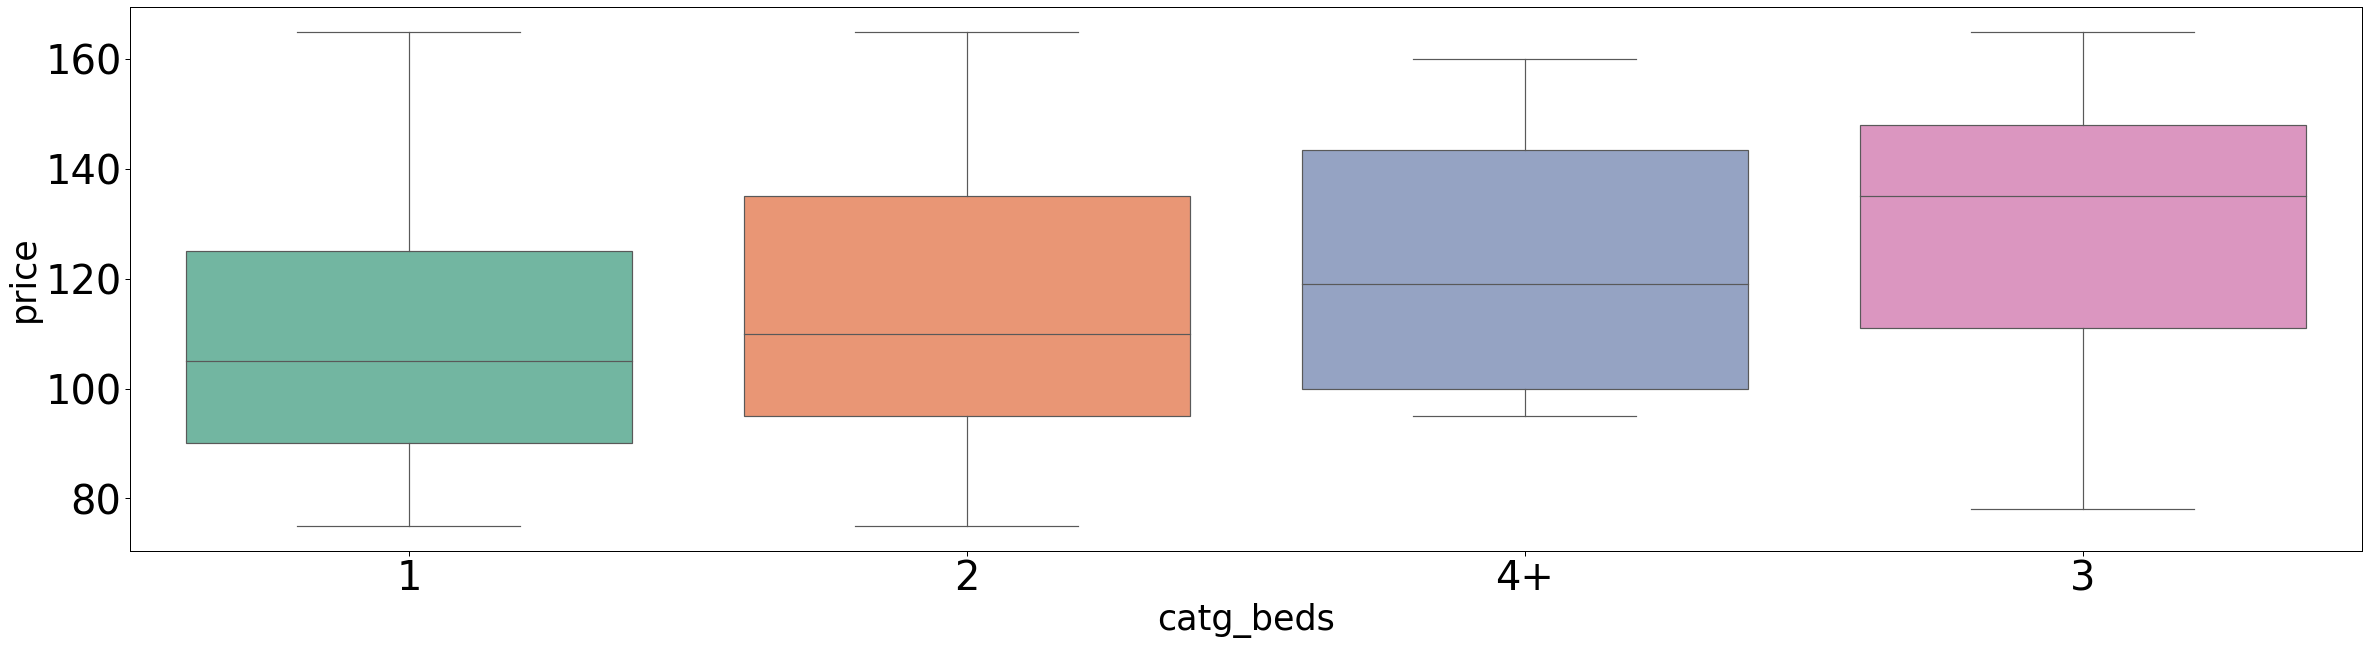

In [118]:
y_col = 'price'

# Prepares a groupby df
grouped = dff[[y_col, catg_ftr]].groupby(catg_ftr)
order_df = pd.DataFrame({col:vals[y_col] for col,vals in grouped}).mean().sort_values(ascending=True)

# remove outliers
dff = dff[dff[y_col].between(dff[y_col].quantile(.05), dff[y_col].quantile(.95))]

# Create a plo
plt.figure(figsize=(40, 10))
ax = sn.boxplot(x=catg_ftr, y=y_col, data=dff, palette="Set2", order=order_df.index)

# Config plot parameters
ax.set_xlabel(catg_ftr,fontsize=35)
ax.set_ylabel(y_col,fontsize=35)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(40)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(40)
    
plt.show()

The boxplot above is the answer to the question 3. We can see that there is some price overlapping (even between the 1-bed & 4+ bed apartments). On the other hand each category has at least a bit greater median than the previous one. Categories 3 and 4+ have nearly identical median but the minimum of 4+ is somewhere around 100 while the minimum of category 3 is close to 60. It is interesting that the 1st quartile of 4+ category is atually lower than the one from category 3.